考虑使用：
+ 以2003年为断点分析前后2个过程的模型（是否会变成一阶差分）
+ 加上月份调整（12）

使用package

In [17]:
getwd()
x=c("readxl","TSA","forecast")
lapply(x, require, character.only = T)

rm(list=ls())

[1] "F:/git/R/course1"

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

加载数据

In [18]:
data <- read_excel("F:\\git\\R\\0510\\bloomberg.xlsx", sheet = "total", col_types = c("skip", "numeric", "numeric"))
ast = data[1] # ast represents asset
num = data[2] # num represents number
ast = ts(ast, frequency = 12,start = 1995) # total net assets
num = ts(num, frequency = 12, start = 1995) # number of FOF funds

### 以2003-1-1为分界点切开

In [35]:
ast1 = ts(ast[1:(8*12)],frequency = 12, start=1995)
ast2 = ts(ast[97:269],frequency = 12, start = 2003)
num1 = ts(num[1:96], frequency = 12, start=1995)
num2 = ts(num[97:269],frequency = 12, start = 2003)

In [36]:
#依次做ARIMA建模
m_ast1 <- auto.arima(log(ast1))
m_ast2 <- auto.arima(log(ast2))
m_num1 <- auto.arima(log(num1))
m_num2 <- auto.arima(log(num2))

下面输出 ARIMA建模的结果，发现除了*m_ast*之外都是$I(2)$.

In [21]:
print("m_ast1");m_ast1;
print("m_ast2");m_ast2;
print("m_num1");m_num1;
print("m_num2");m_num2;

[1] "m_ast1"


Series: log(ast1) 
ARIMA(0,1,0) with drift         

Coefficients:
       drift
      0.0313
s.e.  0.0090

sigma^2 estimated as 0.007855:  log likelihood=95.92
AIC=-187.85   AICc=-187.72   BIC=-182.74

[1] "m_ast2"


Series: log(ast2) 
ARIMA(0,2,1)(1,0,0)[12]                    

Coefficients:
          ma1     sar1
      -0.8697  -0.0305
s.e.   0.0798   0.0787

sigma^2 estimated as 0.001087:  log likelihood=341.22
AIC=-676.43   AICc=-676.29   BIC=-667.01

[1] "m_num1"


Series: log(num1) 
ARIMA(1,2,1)                    

Coefficients:
          ar1      ma1
      -0.2567  -0.9190
s.e.   0.1042   0.0496

sigma^2 estimated as 0.0163:  log likelihood=59.94
AIC=-113.88   AICc=-113.61   BIC=-106.25

[1] "m_num2"


Series: log(num2) 
ARIMA(3,2,2)(2,0,0)[12]                    

Coefficients:
          ar1     ar2      ar3      ma1      ma2     sar1     sar2
      -0.4879  0.3490  -0.1443  -0.0012  -0.8050  -0.0247  -0.0492
s.e.   0.0982  0.1121   0.0893   0.0567   0.0566   0.1016   0.1268

sigma^2 estimated as 0.0005009:  log likelihood=409.62
AIC=-803.25   AICc=-802.36   BIC=-778.11

In [37]:
# 差分模型
m_ast1 <- auto.arima( diff(log(ast1), differences = 1))
mm_ast2 <- auto.arima( diff(log(ast2),differences = 2) )
mm_num1 <- auto.arima( diff(log(num1), differences = 2))
mm_num2 <- auto.arima( diff(log(num2), differences = 2))

In [38]:
# 计算每个模型的残差
r_m_ast1 <- m_ast1$residuals
r_mm_ast2 <- mm_ast2$residuals
r_mm_num1 <- mm_num1$residuals
r_mm_num2 <- mm_num2$residuals

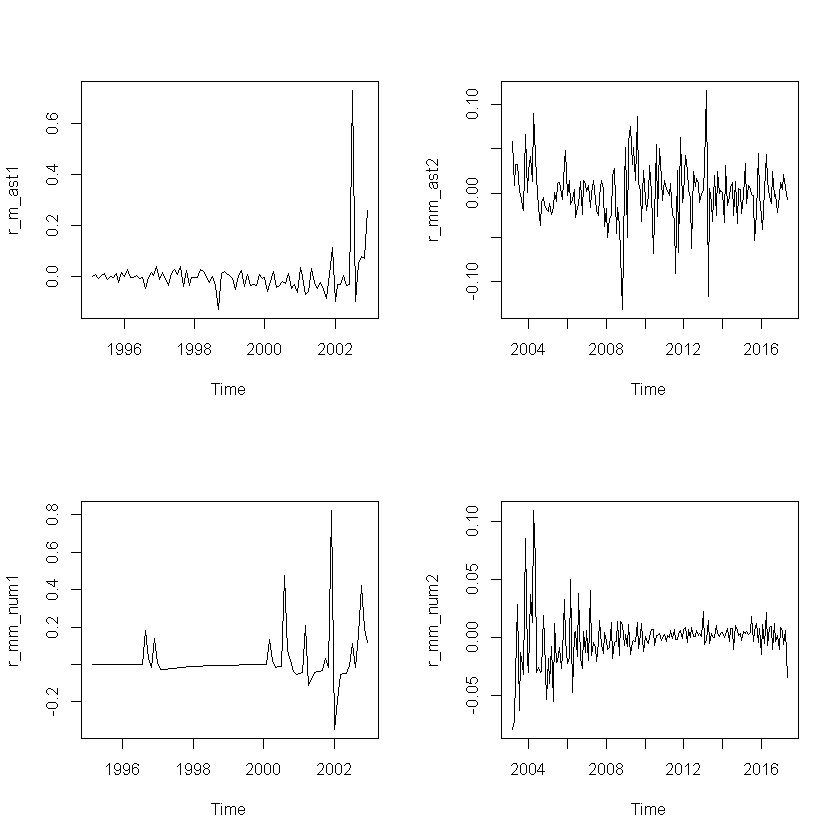

In [39]:
# 绘制残差图
par(mfrow=c(2,2))
plot(r_m_ast1);plot(r_mm_ast2);plot(r_mm_num1);plot(r_mm_num2);

In [40]:
# 残差的白噪声检验
t_ast1 <- Box.test(r_m_ast1, lag = 24, type = "Ljung-Box", fitdf = 1)
t_ast2 <- Box.test(r_mm_ast2, lag = 24, type = "Ljung-Box", fitdf = 2)
t_num1 <- Box.test(r_mm_num1, lag = 24, type = "Ljung-Box", fitdf = 2)
t_num2 <- Box.test(r_mm_num2, lag = 24, type = "Ljung-Box", fitdf = 2)

t_ast1; t_ast2; t_num1;t_num2


	Box-Ljung test

data:  r_m_ast1
X-squared = 14.026, df = 23, p-value = 0.9261



	Box-Ljung test

data:  r_mm_ast2
X-squared = 23.051, df = 22, p-value = 0.3988



	Box-Ljung test

data:  r_mm_num1
X-squared = 19.699, df = 22, p-value = 0.6019



	Box-Ljung test

data:  r_mm_num2
X-squared = 44.883, df = 22, p-value = 0.002746


**Conclusion**:以2003-1-1截点来看的效果，并不是很好。

### 以2002年作为截点来看

[1] "m_ast1"


Series: log(ast1) 
ARIMA(2,2,2)                    

Coefficients:
         ar1      ar2      ma1     ma2
      0.6729  -0.2821  -1.7135  0.7581
s.e.  0.1698   0.1349   0.1380  0.1267

sigma^2 estimated as 0.001015:  log likelihood=166.72
AIC=-323.44   AICc=-322.65   BIC=-311.41

[1] "m_ast2"


Series: log(ast2) 
ARIMA(1,2,1)(1,0,0)[12]                    

Coefficients:
          ar1      ma1     sar1
      -0.1182  -0.9414  -0.0679
s.e.   0.0769   0.0266   0.1362

sigma^2 estimated as 0.00449:  log likelihood=235.26
AIC=-462.52   AICc=-462.29   BIC=-449.68

[1] "m_num1"


Series: log(num1) 
ARIMA(1,1,0) with drift         

Coefficients:
          ar1   drift
      -0.4320  0.0210
s.e.   0.1098  0.0088

sigma^2 estimated as 0.01356:  log likelihood=62.34
AIC=-118.68   AICc=-118.38   BIC=-111.39

[1] "m_num2"


Series: log(num2) 
ARIMA(1,2,2)                    

Coefficients:
         ar1      ma1     ma2
      0.6510  -1.1952  0.2281
s.e.  0.1306   0.1536  0.1404

sigma^2 estimated as 0.001476:  log likelihood=337.64
AIC=-667.27   AICc=-667.05   BIC=-654.43

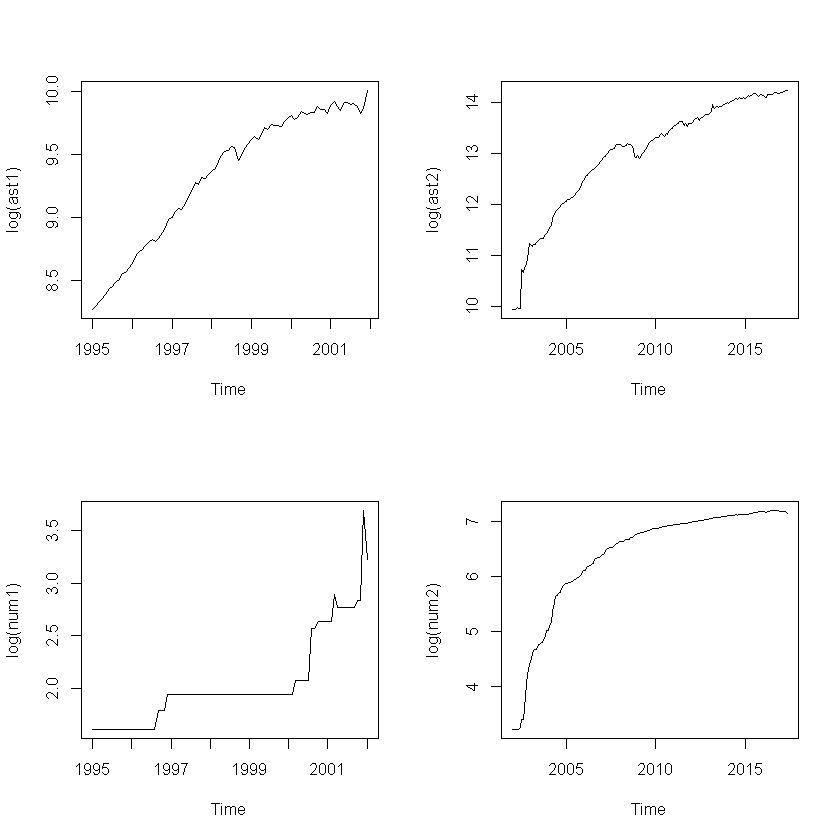

In [41]:
ast1 = ts(ast[1:(7*12)],frequency = 12, start=1995)
ast2 = ts(ast[85:269],frequency = 12, start = 2002)
num1 = ts(num[1:85], frequency = 12, start=1995)
num2 = ts(num[85:269],frequency = 12, start = 2002)
#依次做ARIMA建模
m_ast1 <- auto.arima(log(ast1))
m_ast2 <- auto.arima(log(ast2))
m_num1 <- auto.arima(log(num1))
m_num2 <- auto.arima(log(num2))

print("m_ast1");m_ast1; #arima(2,2,2)
print("m_ast2");m_ast2; #arima(1,2,1)
print("m_num1");m_num1; #arima(1,1,0)
print("m_num2");m_num2; #arima(1,2,2)

par(mfrow=c(2,2))
plot(log(ast1));plot(log(ast2));plot(log(num1));plot(log(num2));

In [43]:
# 差分模型 
mm_ast1 <- auto.arima( diff(log(ast1), differences = 2))
mm_ast2 <- auto.arima( diff(log(ast2),differences = 2) )
m_num1 <- auto.arima( diff(log(num1), differences = 1))
mm_num2 <- auto.arima( diff(log(num2), differences = 2))
# 计算残差
r_mm_ast1 <- mm_ast1$residuals
r_mm_ast2 <- mm_ast2$residuals
r_m_num1 <- m_num1$residuals
r_mm_num2 <- mm_num2$residuals


	Box-Ljung test

data:  r_mm_ast1
X-squared = 10.432, df = 22, p-value = 0.9819



	Box-Ljung test

data:  r_mm_ast2
X-squared = 21.335, df = 22, p-value = 0.5001



	Box-Ljung test

data:  r_m_num1
X-squared = 16.022, df = 23, p-value = 0.8543



	Box-Ljung test

data:  r_mm_num2
X-squared = 25.627, df = 22, p-value = 0.268


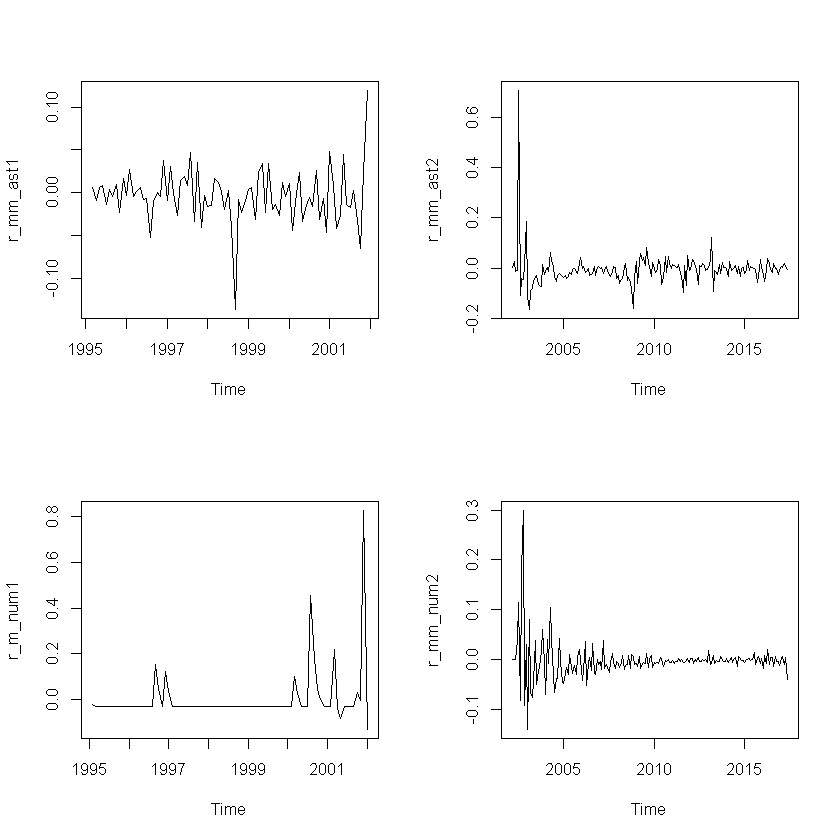

In [44]:
# 绘制残差图
par(mfrow=c(2,2))
plot(r_mm_ast1);plot(r_mm_ast2);plot(r_m_num1);plot(r_mm_num2);
# 残差的白噪声检验
t_ast1 <- Box.test(r_mm_ast1, lag = 24, type = "Ljung-Box", fitdf = 2)
t_ast2 <- Box.test(r_mm_ast2, lag = 24, type = "Ljung-Box", fitdf = 2)
t_num1 <- Box.test(r_m_num1, lag = 24, type = "Ljung-Box", fitdf = 1)
t_num2 <- Box.test(r_mm_num2, lag = 24, type = "Ljung-Box", fitdf = 2)

t_ast1; t_ast2; t_num1;t_num2

**Conclusion**：2012年作为分界点切开，仍然是2阶差分模型；
其残差和显著程度同2013年相比，白噪声的效果更好一些。

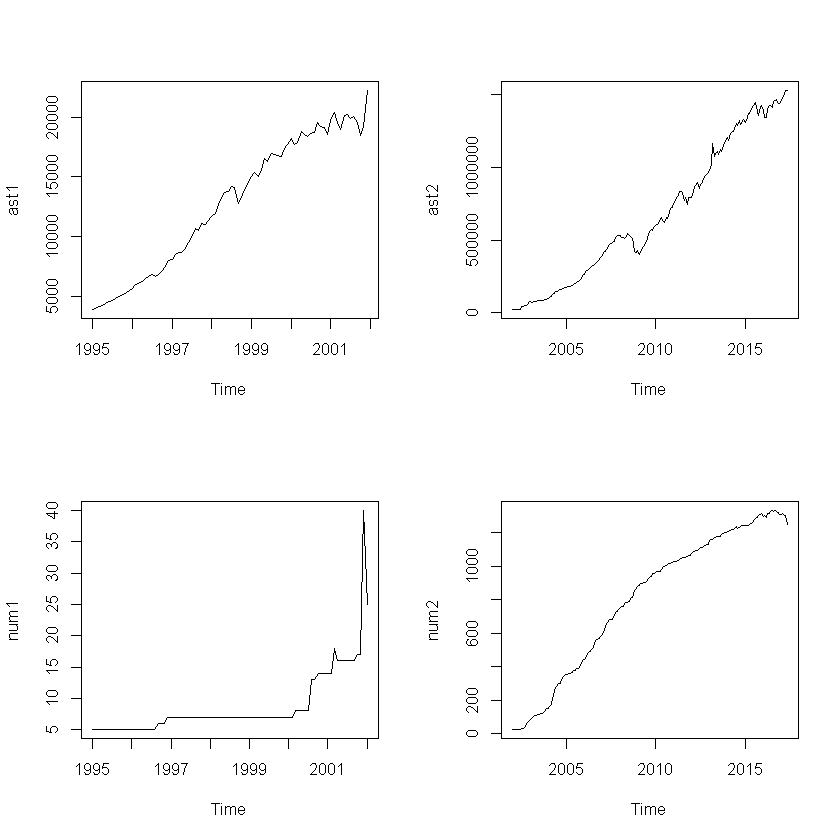

In [29]:
# 在不使用对数的情况下
par(mfrow=c(2,2))
plot(ast1);plot(ast2);plot(num1);plot(num2);

[1] "m_ast1"


Series: ast1 
ARIMA(2,1,0) with drift         

Coefficients:
          ar1      ar2     drift
      -0.0119  -0.4752  208.4219
s.e.   0.1228   0.1209   36.2735

sigma^2 estimated as 245197:  log likelihood=-631.51
AIC=1271.01   AICc=1271.53   BIC=1280.69

[1] "m_ast2"


Series: ast2 
ARIMA(0,1,0) with drift         

Coefficients:
         drift
      8208.351
s.e.  1723.078

sigma^2 estimated as 549278911:  log likelihood=-2112
AIC=4228   AICc=4228.07   BIC=4234.43

[1] "m_num1"


Series: num1 
ARIMA(1,1,0) with drift         

Coefficients:
          ar1   drift
      -0.6282  0.3098
s.e.   0.1071  0.1752

sigma^2 estimated as 6.924:  log likelihood=-199.7
AIC=405.4   AICc=405.7   BIC=412.7

[1] "m_num2"


Series: num2 
ARIMA(0,2,1)                    

Coefficients:
          ma1
      -0.8460
s.e.   0.0607

sigma^2 estimated as 77.86:  log likelihood=-658.27
AIC=1320.54   AICc=1320.61   BIC=1326.96


	Box-Ljung test

data:  r_m_ast1
X-squared = 12.475, df = 22, p-value = 0.9468



	Box-Ljung test

data:  r_m_ast2
X-squared = 32.586, df = 22, p-value = 0.06793



	Box-Ljung test

data:  r_m_num1
X-squared = 6.9879, df = 23, p-value = 0.9995



	Box-Ljung test

data:  r_mm_num2
X-squared = 20.266, df = 22, p-value = 0.5664


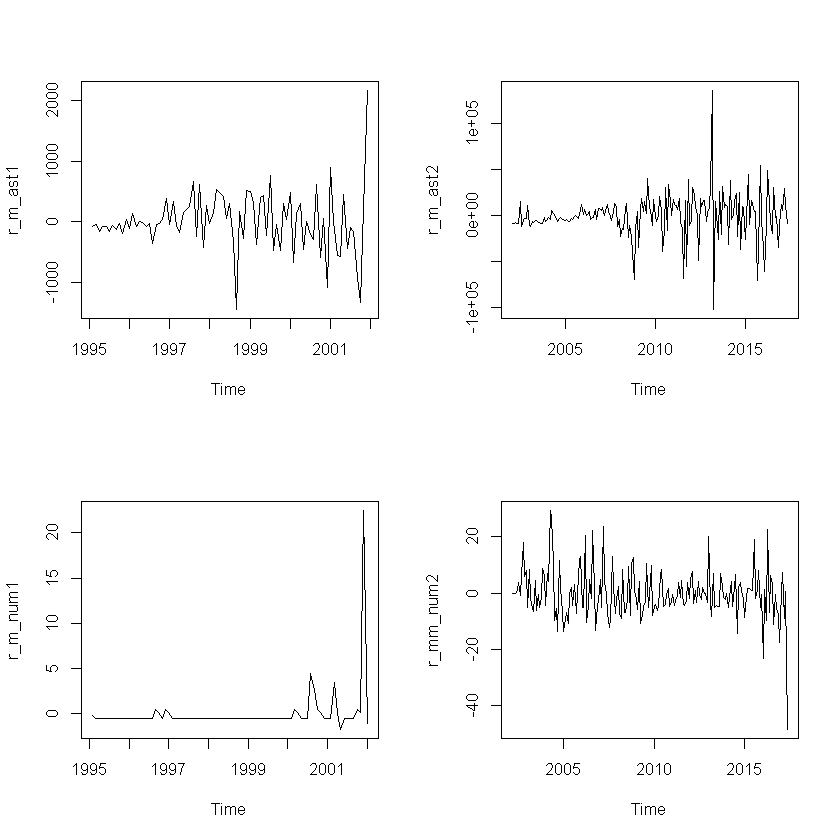

In [30]:
# 不使用对数进行建模
ast1 = ts(ast[1:(7*12)],frequency = 12, start=1995)
ast2 = ts(ast[85:269],frequency = 12, start = 2002)
num1 = ts(num[1:85], frequency = 12, start=1995)
num2 = ts(num[85:269],frequency = 12, start = 2002)
#依次做ARIMA建模
m_ast1 <- auto.arima(ast1)
m_ast2 <- auto.arima(ast2)
m_num1 <- auto.arima(num1)
m_num2 <- auto.arima(num2)

print("m_ast1");m_ast1; #arima(2,1,0)
print("m_ast2");m_ast2; #arima(0,1,0)
print("m_num1");m_num1; #arima(1,1,0)
print("m_num2");m_num2; #arima(0,2,1)

# 差分模型 
m_ast1 <- auto.arima( diff(ast1, differences = 1))
m_ast2 <- auto.arima( diff(ast2,differences = 1) )
m_num1 <- auto.arima( diff(num1, differences = 1))
mm_num2 <- auto.arima( diff(num2, differences = 2))
# 计算残差
r_m_ast1 <- m_ast1$residuals
r_m_ast2 <- m_ast2$residuals
r_m_num1 <- m_num1$residuals
r_mm_num2 <- mm_num2$residuals

# 绘制残差图
par(mfrow=c(2,2))
plot(r_m_ast1);plot(r_m_ast2);plot(r_m_num1);plot(r_mm_num2);
# 残差的白噪声检验
t_ast1 <- Box.test(r_m_ast1, lag = 24, type = "Ljung-Box", fitdf = 2)
t_ast2 <- Box.test(r_m_ast2, lag = 24, type = "Ljung-Box", fitdf = 2)
t_num1 <- Box.test(r_m_num1, lag = 24, type = "Ljung-Box", fitdf = 1)
t_num2 <- Box.test(r_mm_num2, lag = 24, type = "Ljung-Box", fitdf = 2)

t_ast1; t_ast2; t_num1;t_num2


####  考虑到2002-2003年法律落地期，从2004年开始分析

[1] "m_lgast3"
Series: log(ast3) 
ARIMA(0,2,1)                    

Coefficients:
          ma1
      -0.8570
s.e.   0.0721

sigma^2 estimated as 0.001075:  log likelihood=317.73
AIC=-631.46   AICc=-631.38   BIC=-625.32
[1] "m_lgnum3"
Series: log(num3) 
ARIMA(2,2,1)(2,0,0)[12]                    

Coefficients:
         ar1      ar2      ma1    sar1     sar2
      0.3140  -0.0783  -0.7168  0.2470  -0.4025
s.e.  0.1559   0.1163   0.1350  0.1227   0.1119

sigma^2 estimated as 0.0003057:  log likelihood=417.88
AIC=-823.76   AICc=-823.2   BIC=-805.34
[1] "m_ast3"
Series: ast3 
ARIMA(0,1,0) with drift         

Coefficients:
         drift
      8962.175
s.e.  1965.599

sigma^2 estimated as 622058631:  log likelihood=-1846.41
AIC=3696.82   AICc=3696.9   BIC=3702.97
[1] "m_num3"
Series: num3 
ARIMA(0,2,1)(1,0,1)[12]                    

Coefficients:
          ma1     sar1    sma1
      -0.8390  -0.3802  0.6241
s.e.   0.0589   0.2090  0.1730

sigma^2 estimated as 78.17:  log likelihood=-571.

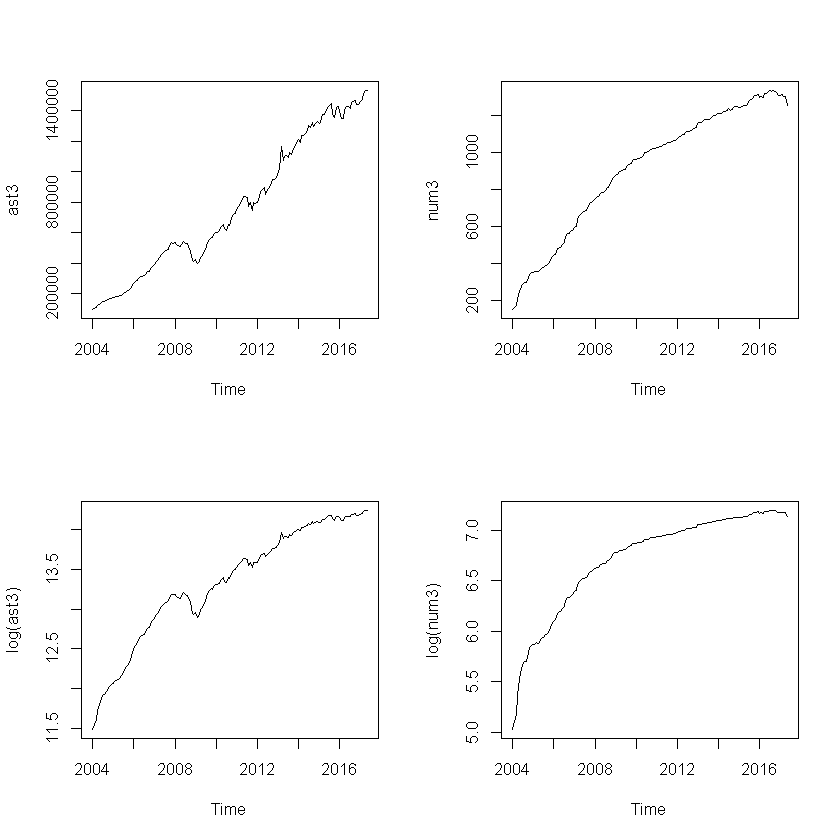

In [50]:
# 截取2004年开始的数据
ast3 <- ts(ast[109:269], frequency = 12, start = 2004)
num3 <- ts(num[109:269], frequency = 12, start = 2004)
# 模型阶数判断
# 取对数的模型
m_lgast3 <- auto.arima(log(ast3))
m_lgnum3 <- auto.arima(log(num3))

print("m_lgast3"); print(m_lgast3); #ARIMA(2,2,1)
print("m_lgnum3"); print(m_lgnum3); #ARIMA(2,2,1)
# 不取对数的模型
m_ast3 <- auto.arima(ast3) #ARIMA(0,1,0)
m_num3 <- auto.arima(num3) #ARIMA(0,2,1)

print("m_ast3"); print(m_ast3);
print("m_num3"); print(m_num3);

# 查看raw data and log data
par(mfrow = c(2,2))
plot(ast3);plot(num3);
plot(log(ast3));plot(log(num3))

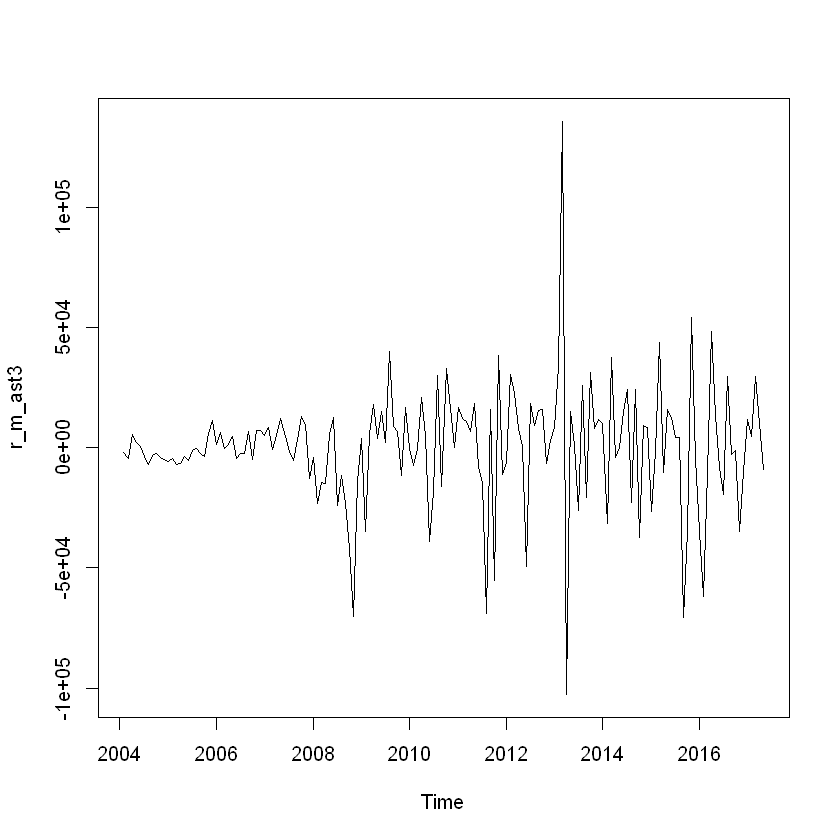


	Box-Ljung test

data:  r_m_ast3
X-squared = 29.782, df = 24, p-value = 0.1921


	Box-Ljung test

data:  r_m_ast3
X-squared = 29.782, df = 24, p-value = 0.1921



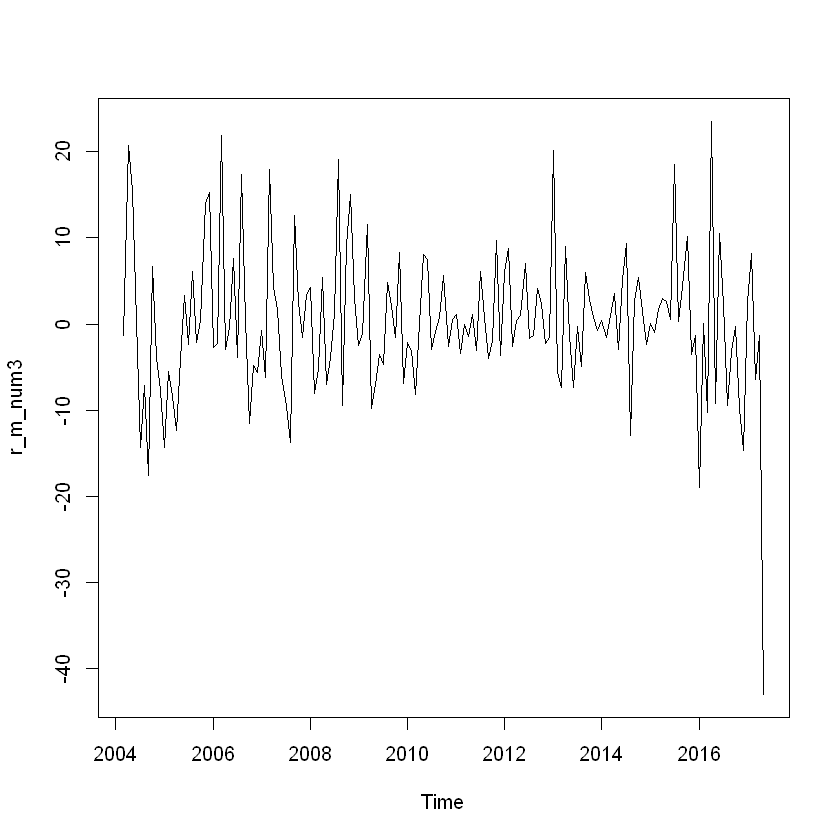

In [52]:
# 直接使用原数据2004年开始进行ARIMA建模
m_ast3 <- auto.arima(diff(ast3, differences = 1))
m_num3 <- auto.arima(diff(num3, differences = 2))

#得到残差
r_m_ast3 <- m_ast3$residuals
r_m_num3 <- m_num3$residuals
#绘制残差图
plot(r_m_ast3);plot(r_m_num3)
# 残差的白噪声检验
t_ast3 <- Box.test(r_m_ast3, lag=24, type = "Ljung-Box")
t_num3 <- Box.test(r_m_ast3, lag=24, type = "Ljung-Box")
print(t_ast3);print(t_num3)

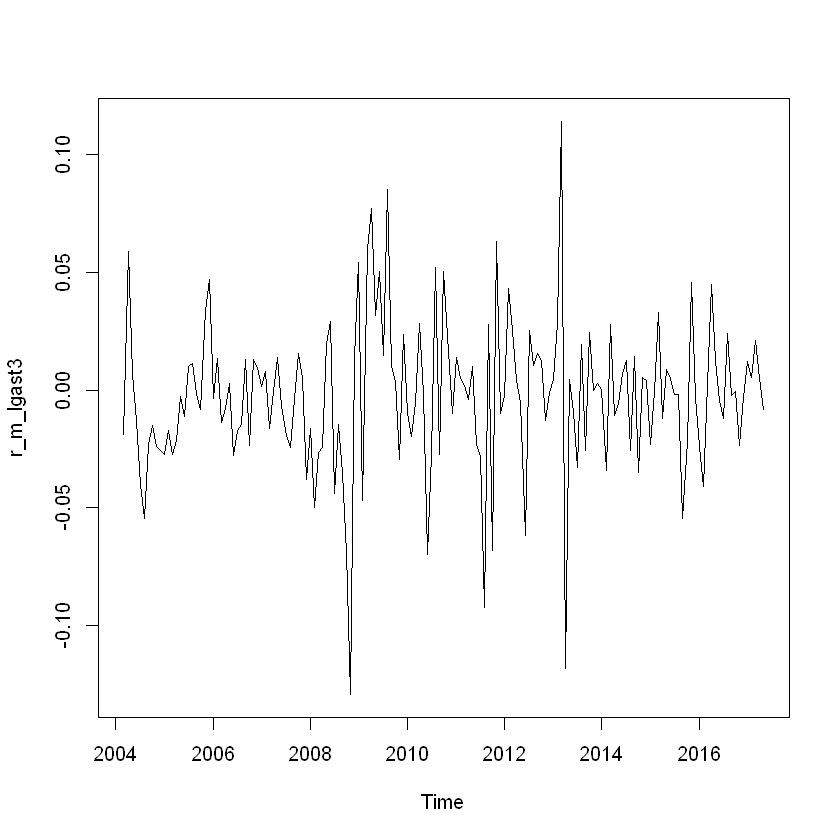


	Box-Ljung test

data:  r_m_lgast3
X-squared = 21.514, df = 24, p-value = 0.6083


	Box-Ljung test

data:  r_m_lgnum3
X-squared = 26.605, df = 24, p-value = 0.3232



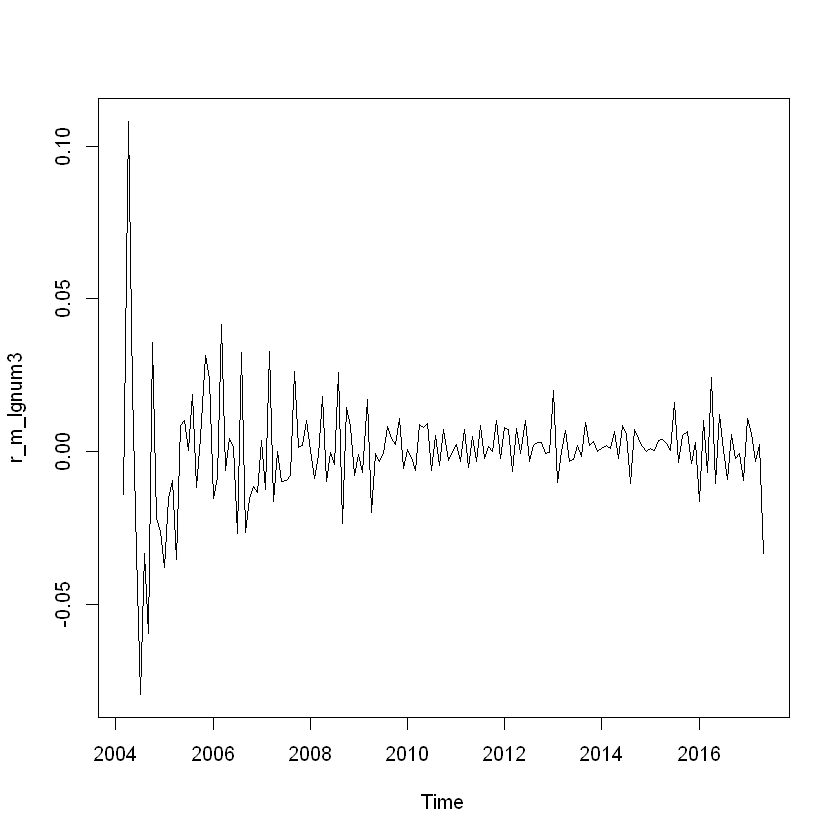

In [55]:
# 使用对数数据2004年开始进行ARIMA建模
m_lgast3 <- auto.arima(diff(log(ast3), differences = 2))
m_lgnum3 <- auto.arima(diff(log(num3), differences = 2))

#得到残差
r_m_lgast3 <- m_lgast3$residuals
r_m_lgnum3 <- m_lgnum3$residuals
#绘制残差图
plot(r_m_lgast3);plot(r_m_lgnum3)
# 残差的白噪声检验
t_ast3 <- Box.test(r_m_lgast3, lag=24, type = "Ljung-Box")
t_num3 <- Box.test(r_m_lgnum3, lag=24, type = "Ljung-Box")
print(t_ast3);print(t_num3)

### 季节模型

In [45]:
12*9

[1] 108

In [31]:
dim(ast)
dim(num)
269-8*12
8*12

[1] 269   1

[1] 269   1

[1] 173

[1] 96